# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Yael Arturo Salado Soto

- ID: A01637736

- My carreer: ITC


# Importing libraries

In [87]:

# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# PART 1
# Use your assigned dataset

## A1 Load data

In [88]:
RunInColab = True     # (False: no  | True: yes)

# colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Define ruta del proyecto
    Ruta = "/content/drive/My Drive/Reto_Sistemas_Eléctricos/NotebooksProfessor/"

else:
    # Define ruta del proyecto
    Ruta = ""
    # Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt
# Dataset url
url = Ruta + "datasets/A01637736_X.csv"

# Load the dataset
data = pd.read_csv(url)

dataset=data.drop(data.columns[0], axis=1)

# Print the data
dataset



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,x1,x2,x3,x4
0,2.549398,-2.757125,-1.690812,-8.365819
1,0.846170,-3.220898,-1.984883,-7.574196
2,8.929031,-2.851495,1.860909,-4.544940
3,-1.510962,7.473982,-2.367350,-0.681757
4,-1.075005,9.367548,-4.702216,-1.949144
...,...,...,...,...
355,6.904517,-1.614177,4.176567,8.131997
356,-3.040871,10.618309,-4.491209,0.728506
357,6.043151,-0.338058,1.589036,5.070806
358,-5.359209,9.926980,-5.959197,0.539257


## A2 Data managment


Print the first 7 rows

In [89]:
dataset.head(7)

,x1,x2,x3,x4
0,2.549398,-2.757125,-1.690812,-8.365819
1,0.846170,-3.220898,-1.984883,-7.574196
2,8.929031,-2.851495,1.860909,-4.544940
3,-1.510962,7.473982,-2.367350,-0.681757
4,-1.075005,9.367548,-4.702216,-1.949144
5,6.914782,1.349436,7.909729,-5.694879
6,7.180507,0.028263,2.852077,-0.266221


Print the last 4 rows

In [90]:
dataset.tail(4)

,x1,x2,x3,x4
356,-3.040871,10.618309,-4.491209,0.728506
357,6.043151,-0.338058,1.589036,5.070806
358,-5.359209,9.926980,-5.959197,0.539257
359,7.860161,-2.893433,2.332576,-7.043664


How many rows and columns are in your data?

Use the `shape` method


In [91]:
dataset.shape

nRow=dataset.shape[0]
nCol=dataset.shape[1]

print("There's",nRow,"rows and",nCol,"columns")

There's 360 rows and 4 columns


Print the name of all columns

Use the `columns` method

In [92]:
dataset.columns

Index(['x1', 'x2', 'x3', 'x4'], dtype='object')

What is the data type in each column

Use the `dtypes` method

In [93]:
dataset.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
dtype: object

What is the meaning of rows and columns?

In [ ]:
# Your responses here
#The values given in the dataset are categorized in the columns x1 all the way to x4 and in the begining we also have a column with irrelevant info with what only looks to be numerating the data, however due to lack of other information we may infer that we are dealing with some sort of meassurements

Print a statistical summary of your columns


In [94]:
summary=dataset.describe()
print(summary)

               x1          x2          x3          x4
count  360.000000  360.000000  360.000000  360.000000
mean     3.075623    0.825403   -1.455600   -2.053291
std      4.304319    4.997778    3.319690    5.434017
min     -8.379232   -7.411863  -10.397119  -14.131241
25%     -0.308021   -2.827983   -3.957236   -5.990170
50%      3.845536   -0.634826   -1.513325   -2.842402
75%      6.713674    3.415968    1.094146    1.896324
max     12.139372   12.430935    7.909729   10.274692


In [95]:
# 1) What is the minumum and maximum values of each variable
min_vals= summary.loc['min']
max_vals= summary.loc['max']
print('the min values are\n',min_vals,'\nAnd the max values are\n',max_vals)

# 2) What is the mean and standar deviation of each variable
mean_vals= summary.loc['mean']
std_vals= summary.loc['std']
print('the mean values are\n',mean_vals,'\nAnd the std values are\n',std_vals)

# 3) What the 25%, 50% and 75% represent?

#They represent the divition of the values in equal parts. The 25% value,is the number below in which we can find the 25% of the data, and the same goes to the other quartiles just changing the percentage


the min values are
 x1    -8.379232
x2    -7.411863
x3   -10.397119
x4   -14.131241
Name: min, dtype: float64 
And the max values are
 x1    12.139372
x2    12.430935
x3     7.909729
x4    10.274692
Name: max, dtype: float64
the mean values are
 x1    3.075623
x2    0.825403
x3   -1.455600
x4   -2.053291
Name: mean, dtype: float64 
And the std values are
 x1    4.304319
x2    4.997778
x3    3.319690
x4    5.434017
Name: std, dtype: float64


Rename the columns using the same name with capital letters

In [96]:
dataset_1 = dataset.rename(columns=lambda x: x.upper())
dataset_1

,X1,X2,X3,X4
0,2.549398,-2.757125,-1.690812,-8.365819
1,0.846170,-3.220898,-1.984883,-7.574196
2,8.929031,-2.851495,1.860909,-4.544940
3,-1.510962,7.473982,-2.367350,-0.681757
4,-1.075005,9.367548,-4.702216,-1.949144
...,...,...,...,...
355,6.904517,-1.614177,4.176567,8.131997
356,-3.040871,10.618309,-4.491209,0.728506
357,6.043151,-0.338058,1.589036,5.070806
358,-5.359209,9.926980,-5.959197,0.539257


Rename the columns to their original names

In [97]:
dataset_2 = dataset.rename(columns=lambda x: x.lower())
dataset_2

,x1,x2,x3,x4
0,2.549398,-2.757125,-1.690812,-8.365819
1,0.846170,-3.220898,-1.984883,-7.574196
2,8.929031,-2.851495,1.860909,-4.544940
3,-1.510962,7.473982,-2.367350,-0.681757
4,-1.075005,9.367548,-4.702216,-1.949144
...,...,...,...,...
355,6.904517,-1.614177,4.176567,8.131997
356,-3.040871,10.618309,-4.491209,0.728506
357,6.043151,-0.338058,1.589036,5.070806
358,-5.359209,9.926980,-5.959197,0.539257


Use two different alternatives to get one of the columns

In [98]:
columna=dataset_2["x1"]
columna

0      2.549398
1      0.846170
2      8.929031
3     -1.510962
4     -1.075005
         ...   
355    6.904517
356   -3.040871
357    6.043151
358   -5.359209
359    7.860161
Name: x1, Length: 360, dtype: float64

In [99]:
column=dataset_2.x1
column

0      2.549398
1      0.846170
2      8.929031
3     -1.510962
4     -1.075005
         ...   
355    6.904517
356   -3.040871
357    6.043151
358   -5.359209
359    7.860161
Name: x1, Length: 360, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [100]:
ds=data.iloc[62:73, 2:4]
ds

,x2,x3
62,-2.260690,-2.051261
63,-2.792249,-2.355391
64,-0.506335,3.068402
65,-3.277837,0.782141
66,-0.441184,-1.088238
67,-1.497845,1.139948
68,-0.430815,1.719460
69,9.648281,-6.636877
70,10.560367,-6.872886
71,1.812991,-2.127175


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [101]:
Ns = data.iloc[:, 2].isnull().sum()
Nt = data.iloc[:, 3].isnull().sum()

NNs = data.iloc[:, 2].notnull().sum()
NNt = data.iloc[:, 3].notnull().sum()

# Verificar que la suma de valores nulos y no nulos sea igual al total de filas
if Ns + NNs and Nt+ NNt ==len(data):
    print("Everything is correct, the sum of null data and not null data is equal to the total number of rows.")
    print("Null data for second column:",Ns,"\nNull data for third column:",Nt,"\nRelevant data for the second column:",NNs,"\nRelevant data for third column:",NNt)
else:
    print("There is an error.")

Everything is correct, the sum of null data and not null data is equal to the total number of rows.
Null data for second column: 0 
Null data for third column: 0 
Relevant data for the second column: 360 
Relevant data for third column: 360


Discard the last column


In [102]:
dataset_3=data.drop(data.columns[4], axis=1)
dataset_3

,Unnamed: 0,x1,x2,x3
0,0,2.549398,-2.757125,-1.690812
1,1,0.846170,-3.220898,-1.984883
2,2,8.929031,-2.851495,1.860909
3,3,-1.510962,7.473982,-2.367350
4,4,-1.075005,9.367548,-4.702216
...,...,...,...,...
355,355,6.904517,-1.614177,4.176567
356,356,-3.040871,10.618309,-4.491209
357,357,6.043151,-0.338058,1.589036
358,358,-5.359209,9.926980,-5.959197


### Questions

Based on the previos results, provide a description of yout dataset

Your response:
On the last points we were able to see from a detailed description of our data showing minimum, maximum, mean and many other values which could give us more information of our dataset. Also we were able to identify the data in our excel and figure out there is a column which provide no value whatsoever, which lead us to delete it. Finally something worthy of mention is that our table has all its data, meaning there were no null values, which I checked viewing column by column in the point where we were supposed to check only columns two and three.




## A3 Data visualization

In [103]:
dataset_1

,X1,X2,X3,X4
0,2.549398,-2.757125,-1.690812,-8.365819
1,0.846170,-3.220898,-1.984883,-7.574196
2,8.929031,-2.851495,1.860909,-4.544940
3,-1.510962,7.473982,-2.367350,-0.681757
4,-1.075005,9.367548,-4.702216,-1.949144
...,...,...,...,...
355,6.904517,-1.614177,4.176567,8.131997
356,-3.040871,10.618309,-4.491209,0.728506
357,6.043151,-0.338058,1.589036,5.070806
358,-5.359209,9.926980,-5.959197,0.539257


Plot in the same figure the histogram of two variables



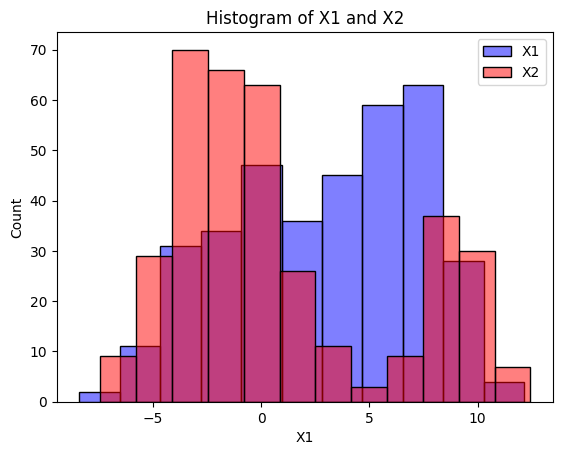

In [104]:
sns.histplot(dataset_1['X1'], alpha=0.5, label='X1',color='b')
sns.histplot(dataset_1['X2'], alpha=0.5, label='X2',color='r')
plt.title('Histogram of X1 and X2')
plt.legend()

plt.show()

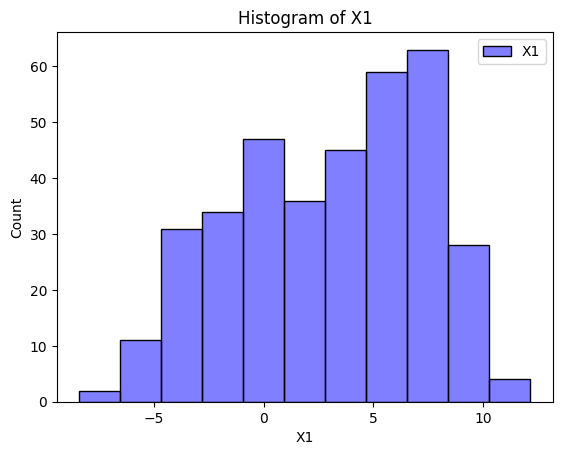

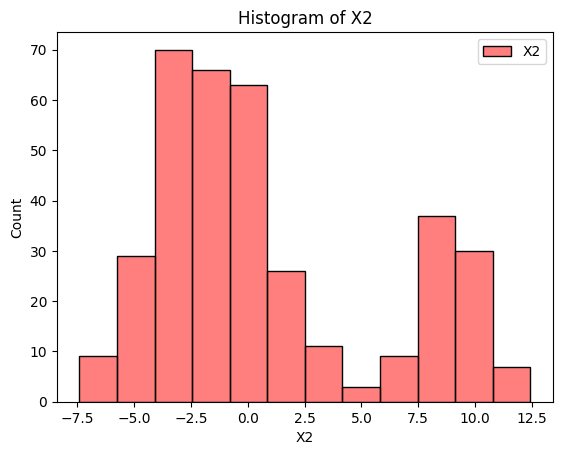

In [105]:

sns.histplot(dataset_1['X1'], alpha=0.5, label='X1',color='b')
plt.title('Histogram of X1')
plt.legend()
plt.show()

sns.histplot(dataset_1['X2'], alpha=0.5, label='X2',color='r')
plt.title('Histogram of X2')
plt.legend()
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot in the same figure the boxplot of two variables

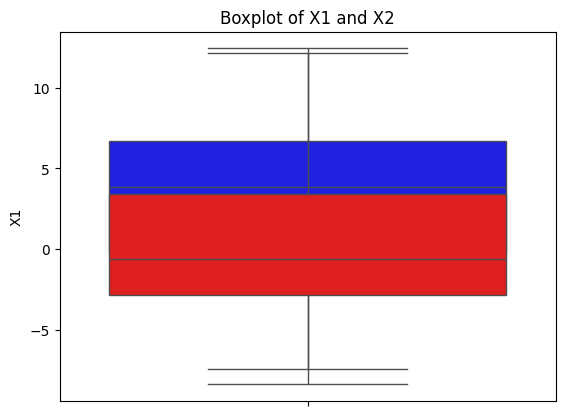

In [106]:
sns.boxplot(dataset_1['X1'],color='b')
sns.boxplot(dataset_1['X2'],color='r')
plt.title('Boxplot of X1 and X2')
plt.show()

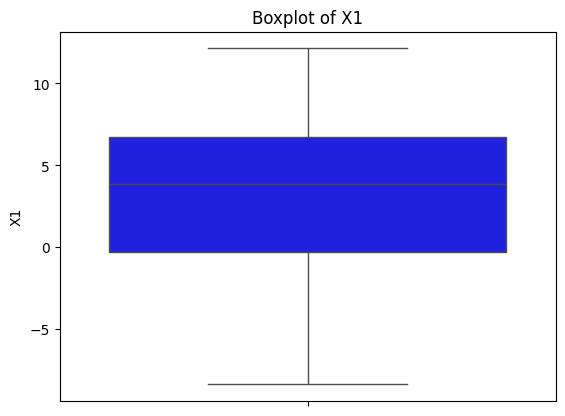

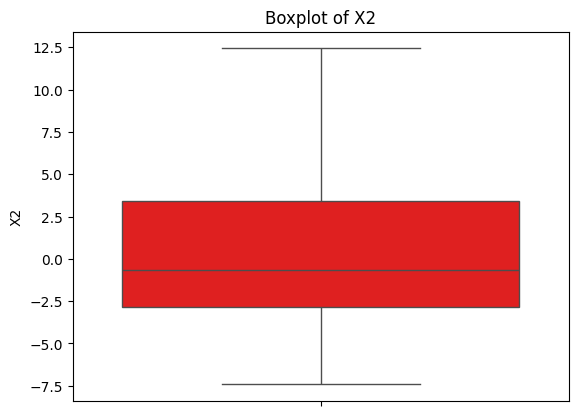

In [107]:
sns.boxplot(dataset_1['X1'],color='b')
plt.title('Boxplot of X1')
plt.show()

sns.boxplot(dataset_1['X2'],color='r')
plt.title('Boxplot of X2')
plt.show()

Plot the scatter plot of two variables

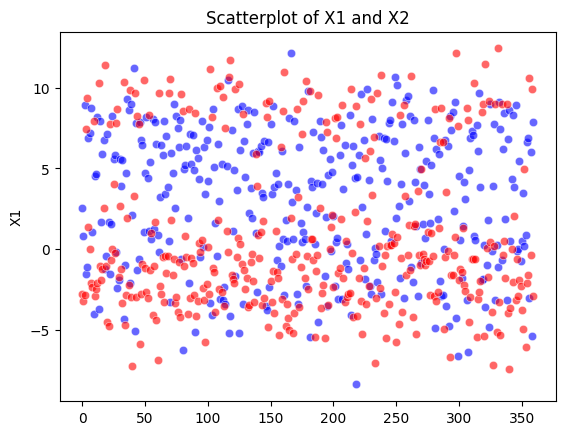

In [108]:
sns.scatterplot(dataset_1['X1'],color='b',alpha=0.6)
sns.scatterplot(dataset_1['X2'],color='r',alpha=0.6)
plt.title('Scatterplot of X1 and X2')
plt.show()

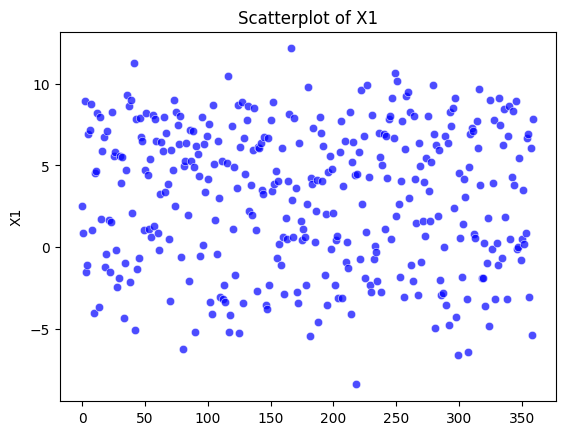

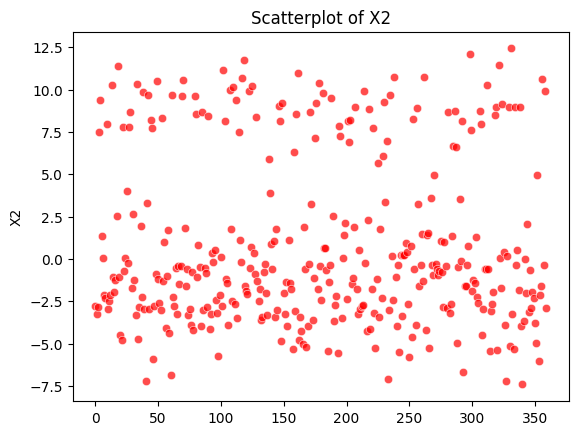

In [109]:
sns.scatterplot(dataset_1['X1'],color='b',alpha=0.7)
plt.title('Scatterplot of X1')
plt.show()

sns.scatterplot(dataset_1['X2'],color='r',alpha=0.7)
plt.title('Scatterplot of X2')
plt.show()

### Questions

Based on the previos plots, provide a description of yout dataset

Your response:
From what we've been ploting we can now have a better idea of our data, we can now see the frecuency of the values in our data, we can also know now the dispersion of our data and if there's any atypical values; which in our data in not the case, finally we can have a better idea of patterns and if we plan to do what we did in the kmeans activity we would have a better idea to see the groups for the scatering



## A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [110]:
K = 5
km = KMeans(n_clusters=K, n_init="auto")

yestimated = km.fit_predict(dataset_1)
yestimated

array([3, 3, 1, 0, 0, 1, 1, 1, 3, 4, 1, 2, 2, 4, 2, 3, 1, 1, 4, 3, 1, 3,
       4, 3, 2, 2, 1, 0, 0, 3, 2, 1, 1, 4, 3, 2, 2, 1, 0, 1, 3, 2, 4, 1,
       0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 3, 1, 3, 1, 1, 3, 4, 3, 2, 2, 2,
       2, 1, 1, 0, 4, 2, 3, 1, 3, 1, 2, 2, 1, 0, 4, 2, 2, 1, 3, 4, 1, 1,
       2, 2, 4, 2, 1, 1, 3, 1, 3, 2, 3, 1, 2, 1, 4, 4, 2, 2, 3, 4, 2, 3,
       4, 3, 4, 3, 4, 3, 2, 4, 4, 1, 3, 2, 0, 3, 2, 4, 2, 1, 4, 2, 2, 2,
       2, 3, 1, 3, 1, 1, 0, 0, 1, 1, 2, 1, 2, 2, 4, 4, 1, 4, 1, 3, 1, 2,
       2, 3, 2, 3, 0, 2, 0, 4, 3, 3, 1, 2, 1, 3, 3, 1, 2, 4, 0, 2, 2, 0,
       0, 3, 4, 3, 2, 4, 3, 2, 2, 3, 1, 2, 4, 1, 1, 3, 2, 3, 0, 4, 1, 2,
       3, 1, 3, 0, 0, 0, 3, 1, 2, 4, 3, 1, 3, 3, 3, 1, 4, 1, 1, 3, 4, 3,
       2, 0, 2, 3, 2, 0, 3, 2, 2, 4, 4, 2, 0, 3, 3, 4, 1, 3, 4, 2, 1, 3,
       1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 2, 0, 2, 2, 4, 2, 2, 1, 3, 1, 4, 3,
       2, 2, 3, 0, 1, 2, 0, 3, 2, 3, 1, 1, 2, 3, 3, 2, 1, 4, 1, 3, 2, 0,
       0, 4, 3, 1, 0, 2, 4, 1, 1, 1, 3, 1, 4, 4, 1,

Add to your dataset a column with the estimated cluster to each data point

In [112]:
dataset_1['Estimated_Cluster'] = yestimated
print(dataset_1)

           X1         X2        X3        X4  Estimated_Cluster
0    2.549398  -2.757125 -1.690812 -8.365819                  3
1    0.846170  -3.220898 -1.984883 -7.574196                  3
2    8.929031  -2.851495  1.860909 -4.544940                  1
3   -1.510962   7.473982 -2.367350 -0.681757                  0
4   -1.075005   9.367548 -4.702216 -1.949144                  0
..        ...        ...       ...       ...                ...
355  6.904517  -1.614177  4.176567  8.131997                  2
356 -3.040871  10.618309 -4.491209  0.728506                  4
357  6.043151  -0.338058  1.589036  5.070806                  2
358 -5.359209   9.926980 -5.959197  0.539257                  4
359  7.860161  -2.893433  2.332576 -7.043664                  1

[360 rows x 5 columns]


Print the number associated to each cluster

In [114]:
cluster_counts = dataset_1['Estimated_Cluster'].value_counts()
print("Asocieted number for each cluster:")
print(cluster_counts)

Asocieted number for each cluster:
1    91
2    90
3    89
4    54
0    36
Name: Estimated_Cluster, dtype: int64


Print the centroids

In [115]:
centroids = km.cluster_centers_

print("Centroids:")
print(centroids)

Centroids:
[[-0.85139726  7.53567874 -4.38499763 -2.51826812]
 [ 6.91101514 -1.76438405  2.150322   -3.80080244]
 [ 6.35373709 -1.00825297 -0.67470778  5.70351051]
 [ 1.44435355 -2.58818158 -2.21691724 -8.29683701]
 [-3.54466061  9.39833982 -5.62603496 -1.43613767]]


Print the intertia metric

In [116]:
inertia = km.inertia_
print("Inertia metric:", inertia)

Inertia metric: 5442.471807148848


Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

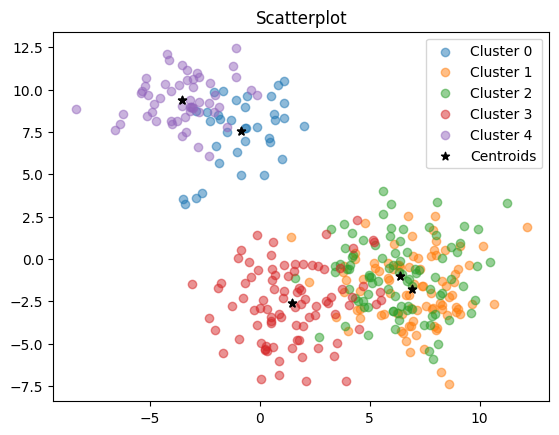

In [126]:
for cluster in range(K):
    cluster_data = dataset_1[dataset_1['Estimated_Cluster'] == cluster]
    plt.scatter(cluster_data['X1'], cluster_data['X2'], label=f'Cluster {cluster}', alpha=0.5)
    plt.scatter(centroids[cluster, 0], centroids[cluster, 1], marker='*', color='black')

# Trazar los centroides de los clústeres
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', color='black', label='Centroids')
plt.title('Scatterplot')
plt.legend()
plt.show()

### Questions

Provides a detailed description of your results

Your response:
We first provide a number of clusters, number which was randomly choosen, in our case we decide to start with 5. with that with that we were able to do some other calculations which then led us to the scatterplot that would help us visualize what we've done. However we are not yet sure if 5 groups were the optimal desition for this case.

## A5 Elbow plot

Compute the Elbow plot

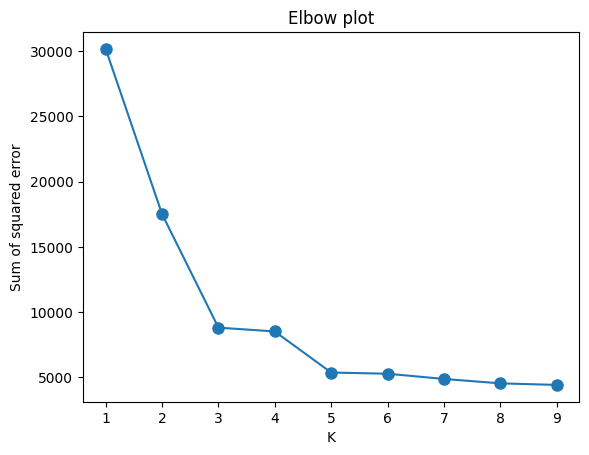

In [130]:
k_rng = range(1, 10)

sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init="auto")
    km.fit(dataset_1[['X1', 'X2', 'X3', 'X4']])
    sse.append(km.inertia_)

plt.plot(k_rng, sse, 'o-', markersize=8)
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: the optimal number is moreless from 7 to 8 but if I would have to choose I'll use 8


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: No my initial guess was using a K=5



# PART 2
# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta:
Considero que si lo logre de manera buena, ya que a lo largo de algunas actividades en clase se me fue bastante fácil discriminar entre variables que me pudieran aportar algo en el analizis de datos de las que eran irrelevantes como variables que solo enumeraban los datos, luego de esto ya es sencillo ver como hay variables relevantes que se relacionan entre sí y que puedan darte información para predecir ciertos datos

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta:
Si bien para algunas bases de datos se me complico un poco, si fui capaz de hacerlo y ver que había variables que como dije en el punto pasado se relacionan entre sí, viendo como explican algunas cosas e incluso como pueden predecir distintos fenomenos